Import the neccessary libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

Data Loading

In [65]:
try:
    df = pd.read_csv("data.csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'data.csv' was not found.")
    exit()

Data loaded successfully.


Data Preprocessing and Feature Engineering

In [66]:
# Rename the columns for easier access
df.columns = ['temperature', 'sales']

# Define the features (X) and target (y)
X = df[["temperature"]] # Features (input to the model)
y = df["sales"] # Target variable (what we want to predict)

Data Splitting

In [67]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Visualization before Training

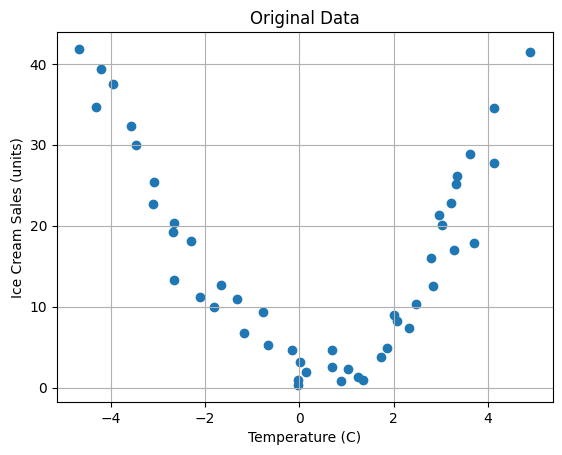

In [68]:
plt.scatter(X,y)
plt.title("Original Data")
plt.xlabel("Temperature (C)")
plt.ylabel("Ice Cream Sales (units)")
plt.grid(True)
plt.show()

Model Training

In [69]:
# Train the Linear Regression model........
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
# Make predictions and evaluate for Linear Model
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test,y_pred_linear)
r2_linear = r2_score(y_test,y_pred_linear)


# Train the polynominal Regression model.........
# Choose the degree of the polynominal. A degree of 2 seems appropriate for this data
# Because it forms the U shape

degree = 2
poly_features = PolynomialFeatures(degree=degree,include_bias=False)

# Transform the features to include polynominal terms
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

# Create and train thre polynominal model
poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train)

# Make predictions and evaluate for polynominal Model
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test,y_pred_poly)
r2_poly = r2_score(y_test,y_pred_poly)

Compare the Models